<a href="https://colab.research.google.com/github/Judy-Choi/Tensorflow_Certificate/blob/main/4_(HW)_%08Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal Metric:
- val_loss : 0.13698
- val_acc : 0.9667

# iris 문제를 tensorflow로 예측해보기

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 1. 데이터셋 준비하기

In [3]:
train_dataset = tfds.load('iris', split='train[:80%]')
test_dataset = tfds.load('iris', split='train[-20%:]')
print(train_dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/iris/2.0.0.incompleteOV3K43/iris-train.tfrecord*...:   0%|          | 0/15…

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'features': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


# 2. 데이터 프리프로세싱

In [4]:
def preprocess(features):
    f, l = features['features'], tf.one_hot(features['label'], 3)
    return f,l

train_data = train_dataset.map(preprocess).batch(10)
test_data = test_dataset.map(preprocess).batch(10)
print(train_data)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


# 3. 모델 설계하기

In [ ]:
model = Sequential([
    Dense(1024, activation='relu'),   
    Dropout(0.5),                             
    Dense(256, activation='relu'),  
    Dropout(0.5),  
    Dense(256, activation='relu'),     
    BatchNormalization(),                     
    Dense(32, activation='relu'),
    BatchNormalization(), 
    Dense(3, activation='softmax'), 
])
  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 
        

# 4. Callback function
- Best checkpoint
- Early stop

In [ ]:
checkpoint_path = "my_ckpt.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 5. 모델 학습하기

In [ ]:
model.fit(train_data,
    validation_data=(test_data),
    epochs=50,
    callbacks=[checkpoint, early_stopping])

model.load_weights(checkpoint_path)
model.save("iris.h5")

Epoch 1/150
 1/12 [=>............................] - ETA: 38s - loss: 1.1846 - acc: 0.6000
Epoch 1: val_loss improved from inf to 1.05866, saving model to my_ckpt.ckpt
12/12 [==============================] - 4s 27ms/step - loss: 1.4464 - acc: 0.3917 - val_loss: 1.0587 - val_acc: 0.3333
Epoch 2/150
 1/12 [=>............................] - ETA: 0s - loss: 1.1508 - acc: 0.6000
Epoch 2: val_loss did not improve from 1.05866
12/12 [==============================] - 0s 9ms/step - loss: 0.9432 - acc: 0.5833 - val_loss: 1.1176 - val_acc: 0.3333
Epoch 3/150
 1/12 [=>............................] - ETA: 0s - loss: 0.9697 - acc: 0.7000
Epoch 3: val_loss did not improve from 1.05866
12/12 [==============================] - 0s 9ms/step - loss: 0.8731 - acc: 0.6500 - val_loss: 1.1449 - val_acc: 0.3333
Epoch 4/150
12/12 [==============================] - ETA: 0s - loss: 0.6644 - acc: 0.6833
Epoch 4: val_loss improved from 1.05866 to 1.03725, saving model to my_ckpt.ckpt
12/12 [======================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              5120      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                        

# Homework 1 : 직접 코딩

## 1. 같은 Dense layer를 2개씩 - 성능 저하
- Batch normalization 추가
- 같은 Layer 2개씩 => 깊게 쌓기

In [8]:
model = Sequential([
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    BatchNormalization(),    
    Dropout(0.3),                             
    
    Dense(256, activation='relu'),  
    BatchNormalization(),
    Dense(256, activation='relu'),  
    BatchNormalization(),
    Dropout(0.3), 

    Dense(32, activation='relu'),     
    BatchNormalization(),                     
    Dense(32, activation='relu'),
    BatchNormalization(), 
    Dropout(0.3), 

    Dense(3, activation='softmax'), 
])
  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 

checkpoint_path = "my_ckpt.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  

model.fit(train_data,
    validation_data=(test_data),
    epochs=50,
    callbacks=[checkpoint, early_stopping])

model.load_weights(checkpoint_path)
model.save("iris.h5")
# 모델의 구조와 파라미터를 출력합니다.
model.summary()
model.evaluate(test_data)

Epoch 1/50
 7/12 [================>.............] - ETA: 0s - loss: 1.1507 - acc: 0.5429  
Epoch 1: val_loss improved from inf to 1.05038, saving model to my_ckpt.ckpt
12/12 [==============================] - 6s 46ms/step - loss: 0.9803 - acc: 0.6250 - val_loss: 1.0504 - val_acc: 0.3333
Epoch 2/50
10/12 [========================>.....] - ETA: 0s - loss: 0.3544 - acc: 0.8600
Epoch 2: val_loss improved from 1.05038 to 1.04257, saving model to my_ckpt.ckpt
12/12 [==============================] - 0s 26ms/step - loss: 0.3453 - acc: 0.8667 - val_loss: 1.0426 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - ETA: 0s - loss: 0.2493 - acc: 0.9417
Epoch 3: val_loss improved from 1.04257 to 0.93023, saving model to my_ckpt.ckpt
12/12 [==============================] - 0s 26ms/step - loss: 0.2493 - acc: 0.9417 - val_loss: 0.9302 - val_acc: 0.3333
Epoch 4/50
12/12 [==============================] - ETA: 0s - loss: 0.1944 - acc: 0.9083
Epoch 4: val_loss improved from 0.93023 to 

[0.864601194858551, 0.5]

## 2. Dropout 감소 - 비슷한 성능, 학습 epoch 감소 (빠른 학습)
- Dropout 0.5 -> 0.3 으로 줄여서 모델을 더 촘촘하게.

In [17]:
model = Sequential([
    Dense(1024, activation='relu'),   
    Dropout(0.3),                             
    Dense(256, activation='relu'),  
    Dropout(0.3),  
    Dense(256, activation='relu'),     
    BatchNormalization(),                     
    Dense(32, activation='relu'),
    BatchNormalization(), 
    Dense(3, activation='softmax'), 
])
  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 

checkpoint_path = "my_ckpt.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  

model.fit(train_data,
    validation_data=(test_data),
    epochs=50,
    callbacks=[checkpoint, early_stopping])

model.load_weights(checkpoint_path)
model.save("iris.h5")
# 모델의 구조와 파라미터를 출력합니다.
model.summary()
model.evaluate(test_data)

Epoch 1/50
 8/12 [===================>..........] - ETA: 0s - loss: 0.9487 - acc: 0.5125 
Epoch 1: val_loss improved from inf to 1.07002, saving model to my_ckpt.ckpt
12/12 [==============================] - 4s 38ms/step - loss: 0.8726 - acc: 0.5917 - val_loss: 1.0700 - val_acc: 0.3333
Epoch 2/50
11/12 [==========================>...] - ETA: 0s - loss: 0.6279 - acc: 0.7364
Epoch 2: val_loss did not improve from 1.07002
12/12 [==============================] - 0s 8ms/step - loss: 0.6009 - acc: 0.7500 - val_loss: 1.0834 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - ETA: 0s - loss: 0.6376 - acc: 0.7417
Epoch 3: val_loss did not improve from 1.07002
12/12 [==============================] - 0s 7ms/step - loss: 0.6376 - acc: 0.7417 - val_loss: 1.1333 - val_acc: 0.3667
Epoch 4/50
11/12 [==========================>...] - ETA: 0s - loss: 0.4322 - acc: 0.8182
Epoch 4: val_loss did not improve from 1.07002
12/12 [==============================] - 0s 9ms/step - loss: 0.4197

[0.10655168443918228, 0.9333333373069763]

# Homework 2 : ChatGPT

## Dense Layer - Best!

Epoch 1/100
1/4 [======>.......................] - ETA: 14s - loss: 2.0311 - accuracy: 0.1250
Epoch 1: val_loss improved from inf to 1.34460, saving model to iris.h5
4/4 [==============================] - 5s 132ms/step - loss: 1.6974 - accuracy: 0.2833 - val_loss: 1.3446 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 1.3460 - accuracy: 0.3438
Epoch 2: val_loss improved from 1.34460 to 1.11954, saving model to iris.h5
4/4 [==============================] - 0s 40ms/step - loss: 1.0494 - accuracy: 0.4667 - val_loss: 1.1195 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 0.5988 - accuracy: 0.7188
Epoch 3: val_loss improved from 1.11954 to 1.05540, saving model to iris.h5
4/4 [==============================] - 0s 31ms/step - loss: 0.6919 - accuracy: 0.6583 - val_loss: 1.0554 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/100
1/4 [======>.......................] - ETA: 0s - loss: 0.490

1/1 [==============================] - 0s 90ms/step


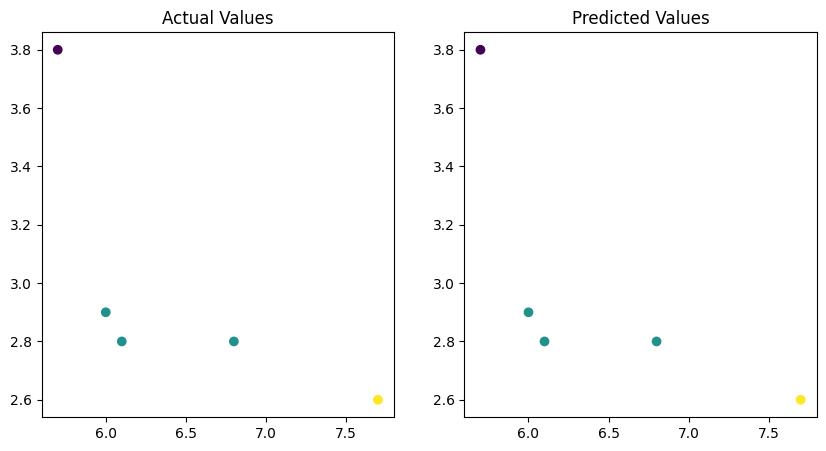

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
checkpoint = ModelCheckpoint('iris.h5', save_best_only=True, save_weights_only=True, verbose=1)
early_stop = EarlyStopping(patience=10, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(patience=5, monitor='val_loss', factor=0.2, verbose=1)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[checkpoint, early_stop, reduce_lr], verbose=1)

# Print validation accuracy and loss
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)

# Inference on test data
X_test = X_val[:5]
y_test = y_val[:5]
y_pred = model.predict(X_test)

# Draw a plot of predicted value and actual value
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test)
axs[0].set_title('Actual Values')
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred.argmax(axis=1))
axs[1].set_title('Predicted Values')
plt.show()
